In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
word_vec_dim = 50
num_classes = 11

In [16]:
X_train = np.random.rand(10, 100, word_vec_dim)
y_train = np.random.randint(num_classes, size=(10,))

In [11]:
def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%X_train.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx] }
            # get batch size
            actual_batch_size = yd[i:i+batch_size].shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

In [12]:
def model(X, y):
    cell = tf.contrib.rnn.LSTMCell(128)
    outputs, _ = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32) # Outputs: N x L x W
    final_output = outputs[:, -1, :]
    y_out = tf.layers.dense(final_output, num_classes)
    
    return y_out
    
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, None, word_vec_dim])
y = tf.placeholder(tf.int64, [None])

y_out = model(X, y)
mean_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y, num_classes), logits=y_out))
optimizer = tf.train.AdamOptimizer()

# batch normalization in tensorflow requires this extra dependency
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(mean_loss)

Iteration 0: with minibatch training loss = 2.31 and accuracy of 0
Iteration 1: with minibatch training loss = 1.74 and accuracy of 1
Epoch 1, Overall loss = 2.03 and accuracy of 0


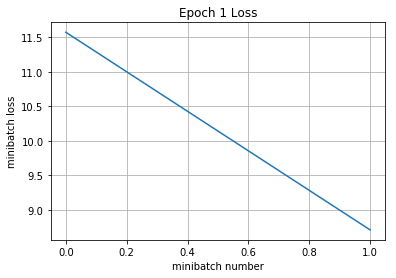

Iteration 2: with minibatch training loss = 1.19 and accuracy of 1
Iteration 3: with minibatch training loss = 0.759 and accuracy of 1
Epoch 2, Overall loss = 0.975 and accuracy of 1


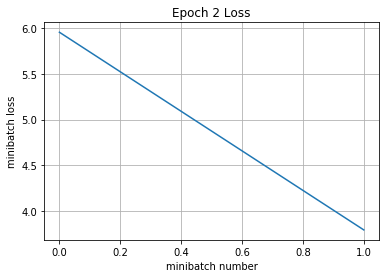

Iteration 4: with minibatch training loss = 0.404 and accuracy of 1
Iteration 5: with minibatch training loss = 0.209 and accuracy of 1
Epoch 3, Overall loss = 0.307 and accuracy of 1


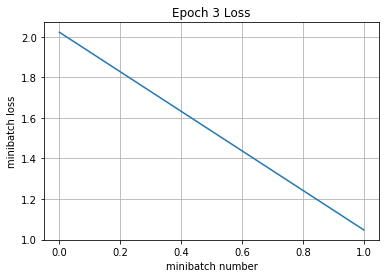

Iteration 6: with minibatch training loss = 0.102 and accuracy of 1
Iteration 7: with minibatch training loss = 0.0572 and accuracy of 1
Epoch 4, Overall loss = 0.0794 and accuracy of 1


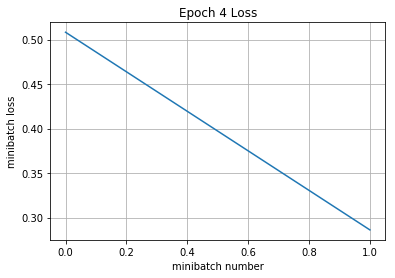

Iteration 8: with minibatch training loss = 0.0325 and accuracy of 1
Iteration 9: with minibatch training loss = 0.0213 and accuracy of 1
Epoch 5, Overall loss = 0.0269 and accuracy of 1


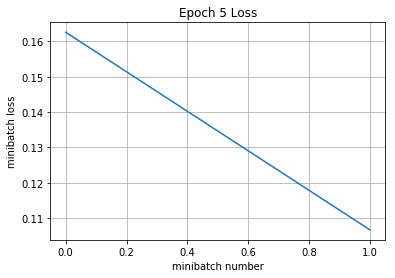

Iteration 10: with minibatch training loss = 0.0137 and accuracy of 1
Iteration 11: with minibatch training loss = 0.00991 and accuracy of 1
Epoch 6, Overall loss = 0.0118 and accuracy of 1


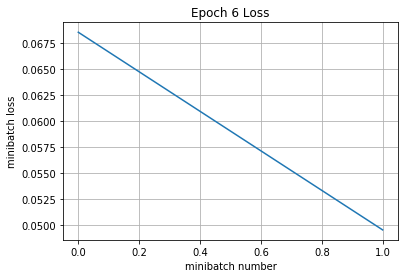

Iteration 12: with minibatch training loss = 0.00698 and accuracy of 1
Iteration 13: with minibatch training loss = 0.00541 and accuracy of 1
Epoch 7, Overall loss = 0.0062 and accuracy of 1


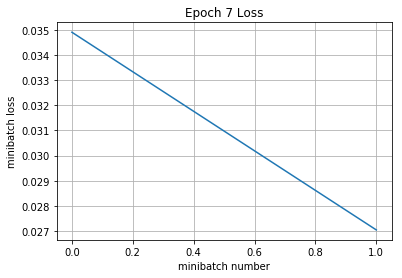

Iteration 14: with minibatch training loss = 0.00409 and accuracy of 1
Iteration 15: with minibatch training loss = 0.00333 and accuracy of 1
Epoch 8, Overall loss = 0.00371 and accuracy of 1


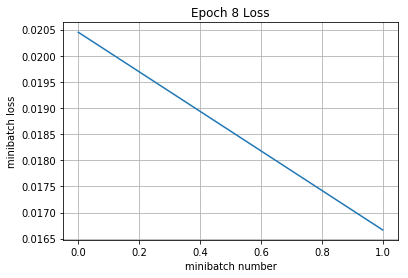

Iteration 16: with minibatch training loss = 0.00266 and accuracy of 1
Iteration 17: with minibatch training loss = 0.00225 and accuracy of 1
Epoch 9, Overall loss = 0.00245 and accuracy of 1


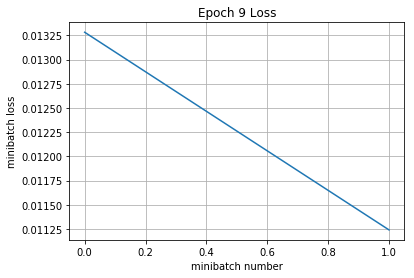

Iteration 18: with minibatch training loss = 0.00186 and accuracy of 1
Iteration 19: with minibatch training loss = 0.00162 and accuracy of 1
Epoch 10, Overall loss = 0.00174 and accuracy of 1


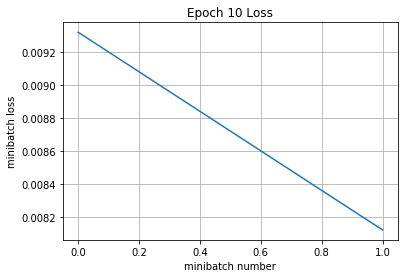

(0.0017438251525163651, 1)

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
run_model(session=sess,
          predict=y_out,
          loss_val=mean_loss,
          Xd=X_train,
          yd=y_train,
          epochs=10,
          batch_size=5,
          print_every=1,
          training=train_step,
          plot_losses=True)

Tensor("dense/BiasAdd:0", shape=(?, 11), dtype=float32)
